### Data Source Details
Data source location:-

The Dataset is available for free download using the below link.
https://www.chapelhillopendata.org/explore/dataset/police-arrests-made/download/?format=csv&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%3B


Data source Discovery:-
I found this Dataset in one of the links provided in the UMBC Box Notes. I went through a lot of other Datasets but I felt that this Dataset can meet our Data 601 objective of EDA.

Legality and Cost:-
This Dataset is absolutely free to download and legal to access as well.


Documented EDA:-
There's no such EDA available on the web for this Dataset.

Project Proposal:-
The size of this Dataset is 2.6 MB with 17 columns and 16254 rows and this file with these many records fits perfectly into the Data 601 Objectives of Cleaning and Visualization. A good EDA can be documented using this Dataset.

In [1]:
#Importing the required packages to extract the data

import pandas 
import matplotlib.pyplot as plt

p_arrests = pandas.read_csv(r"https://www.chapelhillopendata.org/explore/dataset/police-arrests-made/download/?format=csv&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%2C")

print('(Number of rows, Columns)')
p_arrests.shape




(Number of rows, Columns)


(91, 22)

### To view Data Types of the Data Loaded from the Excel

In [163]:
p_arrests.dtypes

Incident Id                   int64
Primary Charge               object
Street                       object
City                         object
State                        object
Zipcode                     float64
Date of Arrest               object
Time of Arrest               object
Age                         float64
Race                         object
Gender                       object
Ethnicity                    object
Type of Arrest               object
Drugs or Alcohol Present     object
Weapon Present               object
Disposition                  object
latitude_longitude           object
dtype: object

In [164]:
p_arrests.describe(include='object')


#General overview of the Data 

,Primary Charge,Street,City,State,Date of Arrest,Time of Arrest,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,latitude_longitude
count,16254,16240,16206,16181,16254,16254,15285,15285,11328,16253,15905,16160,16245,16254
unique,1188,5861,34,1,3416,1435,7,2,3,3,3,7,2,3323
top,FAIL TO APPEAR/COMPL,828 MARTIN LUTHER KING JR BLVD,CHAPEL HILL,NC,2010-10-02,3:00 PM,W,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.926893,-79.0529265"
freq,1687,588,15832,16181,43,56,7425,12265,10356,5983,9249,15940,14837,670


__As the incident Id has 0 Null rows, I decided not to drop any rows as the null values of some columns in a row 
do not have much impact on the overall data

In [165]:
p_arrests.isnull().sum()

Incident Id                    0
Primary Charge                 0
Street                        14
City                          48
State                         73
Zipcode                      888
Date of Arrest                 0
Time of Arrest                 0
Age                          968
Race                         969
Gender                       969
Ethnicity                   4926
Type of Arrest                 1
Drugs or Alcohol Present     349
Weapon Present                94
Disposition                    9
latitude_longitude             0
dtype: int64

### Added a new column "Year" extracted from "Date of Arrest" Column to Plot the Crime Data Year wise

Then using the Year Field I plotted a Line Graph


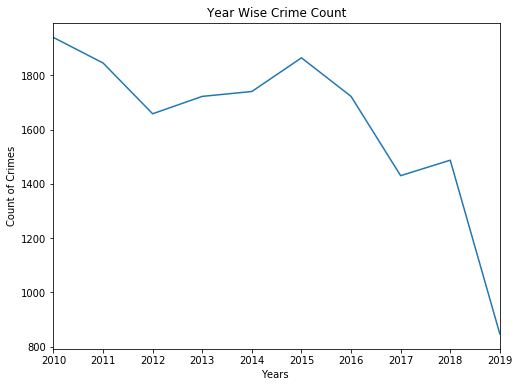

From the Graph we can observe that the crime rate has reduced drastically over the past Decade


In [166]:
list_of_years=[]

#Changed the Datatype of Date of Arrest column to extract the year from it
p_arrests['Date of Arrest']= pd.to_datetime(p_arrests['Date of Arrest'])
for j in p_arrests['Date of Arrest']:
    list_of_years.append(j.year)

#Added a new column "Year" to the Data Frame and plotted a line Graph
p_arrests['year']=l1
_=p_arrests.groupby(['year']).count()['Incident Id'].plot(kind='line',title='Year Wise Crime Count',figsize=(8, 6))
_=plt.xlabel('Years ')
_=plt.ylabel('Count of Crimes')
plt.show()

print('From the Graph we can observe that the crime rate has reduced drastically over the past Decade')
#We can see that the crime rate has rapidly decreased from the past

Import the required packages again to plot the Geographic Data

In [167]:
# https://seaborn.pydata.org/examples/index.html
import seaborn as sns
print('sns',sns.__version__)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import geopandas

sns 0.9.0


### To Plot the Geographical distribution of the Incidents that occured using the latitude and longitude data

In [168]:
import geopandas as gpd   ## importing geopandas to plot longitiudes and lattitudes describing the product purchased
from shapely.geometry import Point ## import point to create a location point from latitudes and longitudes 
print('sns',sns.__version__)
p_arrests['City'].fillna('No City',inplace=True)

#Extracting the Latitude and Longitude values from the Data Set(There is only one column which contains both of them)
#Hence, I created two lists and splitted the original column
lat=[]
long=[]
for i in p_arrests['latitude_longitude']:
    lat.append(float(i.split(',')[0]))
    long.append(float(i.split(',')[1]))
print('Max value of longitude value',max(long),'Min value of longitude value',min(long))
print('Max value of latitude value',max(lat),'Min value of latitude value',min(lat))


#Added new longitude and Latitude values to the Data Frame
p_arrests.insert(3,"Longitude",long)
p_arrests.insert(4,"Latitude",lat)




#plt.scatter(long,lat)



sns 0.9.0
Max value of longitude value -73.65263 Min value of longitude value -170.76852275
Max value of latitude value 46.62669 Min value of latitude value -14.323896657


In [169]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
def make_point(row):
    return Point(row.Longitude, row.Latitude)

# Go through every row, and make a point out of its lat and lon
points = p_arrests.apply(make_point, axis=1)

# Make a new GeoDataFrame
# using the data from our old sales_2009
# but also adding in the geometry we just made
Geo_sales= gpd.GeoDataFrame(p_arrests, geometry=points)

# It doesn't come with a CRS because it's a CSV, so let's
# say "hey, let's use the standard shape of the earth etc"
Geo_sales.crs = {'init': 'epsg:4326'}


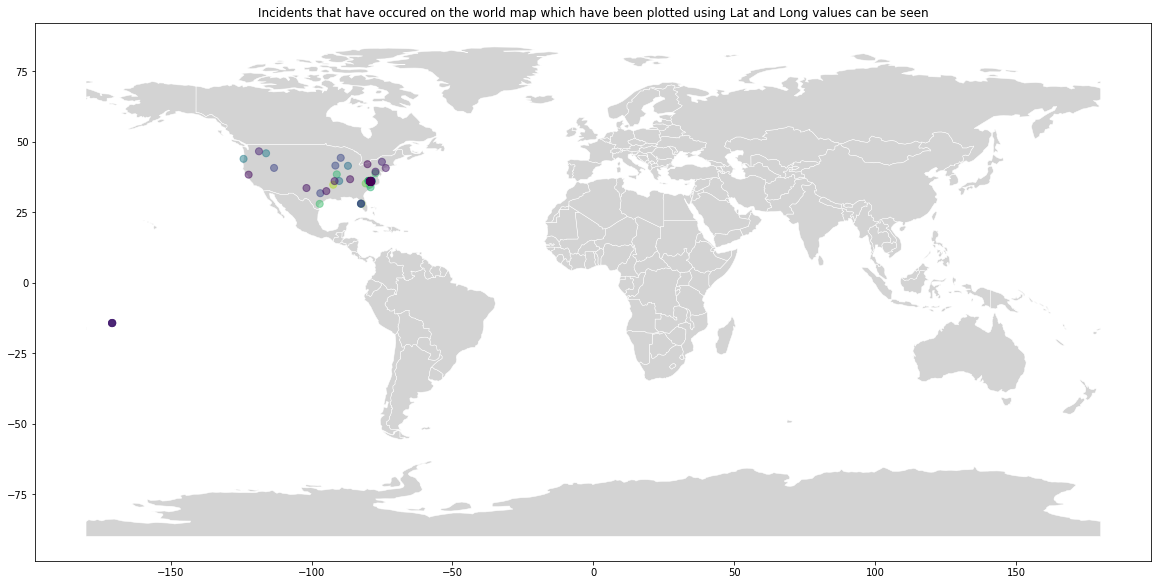

In [170]:
# Save the first layer as ax
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(20,10))
# Pass ax=ax to the second layer
Geo_sales.plot(markersize=50, alpha=0.5, ax=ax,column='Incident Id')
_=plt.title('Incidents that have occured on the world map which have been plotted using Lat and Long values can be seen')

plt.show()

### Crimes committed based on Gender

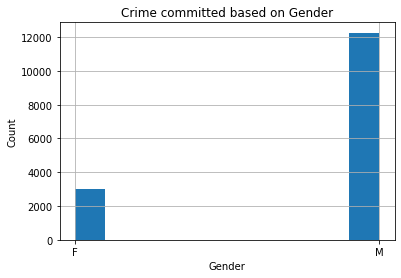

In [171]:
_=p_arrests['Gender'].hist()
_=plt.title('Crime committed based on Gender')
_=plt.xlabel('Gender')
_=plt.ylabel('Count')
plt.show()


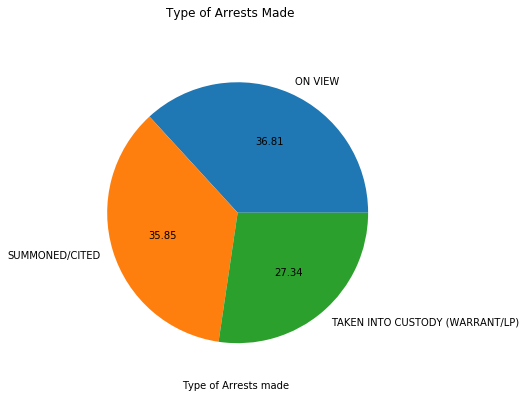

In [172]:
a=p_arrests.groupby(['Type of Arrest']).count()['Incident Id']
a.plot.pie(subplots=True,title='Type of Arrests Made',autopct='%1.2f',figsize=(8, 6))
#a.plot(kind='pie',figsize=(8, 6))
a=plt.xlabel('Type of Arrests made ')
a=plt.ylabel('')

plt.show()

#Graph to show the Type of Arrests Made

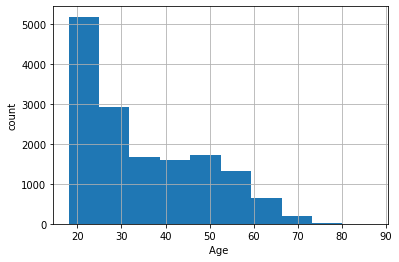

In [173]:
_=p_arrests['Age'].hist()
_=plt.xlabel('Age ')
_=plt.ylabel('count')
plt.show()

#Graph to show count of crimes based on age

In [174]:
#gen_grp=p_arrests.groupby(['Gender','Weapon_Present'])
#gen_grp.last()
#a=p_arrests.groupby(['Gender','Weapon_Present']).count()
p_arrests.rename(columns = {'Weapon Present':'Weapon_Present'}, inplace = True)
#p_arrests.columns =[column.replace(" ", "_") for column in p_arrests.columns]
p_arrests.query('Weapon_Present == "HANDGUN"', inplace = True)
gen_grp=p_arrests.groupby(['Gender','Weapon_Present','Age'])
gen_grp.first()

Incident Id                      Primary Charge  \
Gender Weapon_Present Age                                                     
F      HANDGUN        19.0        39881  CONSPIRACY TO COMMIT ARMED ROBBERY   
                      20.0        24838              POSS STOLEN FIREARM  F   
                      21.0        37174                                 CCW   
                      24.0        39757                      IDENTITY THEFT   
                      25.0        36566                                 CCW   
                      26.0        37464                                 CCW   
                      27.0        36842                              CCW  M   
                      30.0        24740                                 CCW   
M      HANDGUN        18.0        39511                                 CCW   
                      19.0        39883  CONSPIRACY TO COMMIT ARMED ROBBERY   
                      20.0        39880                             ROBBERY   
                      21.0        39653              COMMON LAW-GOING ARMED   
                      22.0        39394                  WEAP-POSS BY FELON   
                      23.0        37749                   ASSAULT-POINT GUN   
                      24.0        38647                     DRUGS-MISD POSS   
                      25.0        40474    ASSAULT ON FEMALE/SIMPLE ASSAULT   
                      26.0        39882                             ROBBERY   
                      27.0        40201                BREAKING/LARC-FELONY   
                      28.0        38731                                 CCW   
                      29.0        40200      ATTEMPTED BREAKING/LARC-FELONY   
                      30.0        38675                ADW W/ MINOR PRESENT   
                      31.0        37408                CCW PERMIT VIOLATION   
                      32.0        35815                      IDENTITY THEFT   
                      33.0        39973         CCW AFTER CONSUMING ALCOHOL   
                      34.0        38484                 POSS STOLEN FIREARM   
                      35.0        36276       DISCHARGING OF FIREARM/BB GUN   
                      36.0        38513                 POSS STOLEN FIREARM   
                      37.0        26907                             ROBBERY   
                      38.0        40059                    POSS COCAINE FEL   
                      39.0        37914                                 CCW   
                      40.0        38759                   POSS STOLEN GOODS   
                      41.0        37570                                 CCW   
                      42.0        29848                   POSS STOLEN GOODS   
                      43.0        39851            VIOLATION OF COURT ORDER   
                      44.0        25266                                 CCW   
                      45.0        26292         CCW-POSS/CONCEALING WEAPONS   
                      46.0        33287                 MURDER-FIRST DEG  F   
                      49.0        28621                    MURDER-FIRST DEG   
                      50.0        27183                CCW PERMIT VIOLATION   
                      52.0        24433            ASSAULT BY STRANGULATION   
                      57.0        39737                FAIL TO APPEAR/COMPL   
                      64.0        29932             ASSAULT W DEADLY WEAPON   

                                                     Street  Longitude  \
Gender Weapon_Present Age                                                
F      HANDGUN        19.0                    107 MARKET ST -79.065715   
                      20.0       BRADLEY ROAD AT READE ROAD -79.057791   
                      21.0                   101 MANNING DR -79.051081   
                      24.0               1800 E FRANKLIN ST -79.025368   
                      25.0      1748 FORDHAM BLVD/EUROPA DR -79.018177   
                      26.0      1

### To find out how many cases involved the use of Handgun, Grouped by Gender



In [175]:
p_arrests.columns =[column.replace(" ", "_") for column in p_arrests.columns]
p_arrests.query('Weapon_Present == "HANDGUN"', inplace = True)


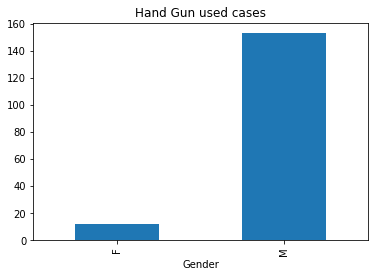

In [176]:
p_arrests.columns =[column.replace(" ", "_") for column in p_arrests.columns]
_=p_arrests.groupby(['Gender']).count()['Weapon_Present'].plot(kind='bar',title='Hand Gun used cases')
plt.show()

### By Analysing the Data we have made lot of observations and this visualisation will certainly help to look 
### at the Data in the given Data set more easily and understand what is in it